# CNN with the whole dataset
## Naive CNN

In [0]:
# setup
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import math
from google.colab import drive
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Project247/'
# root_path = 'gdrive/Shared with me/Project247/'

X_test = np.load(root_path+"X_test.npy")
y_test = np.load(root_path+"y_test.npy")
person_train_valid = np.load(root_path+"person_train_valid.npy")
X_train_valid = np.load(root_path+"X_train_valid.npy")
y_train_valid = np.load(root_path+"y_train_valid.npy")
person_test = np.load(root_path+"person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

# test GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)
Found GPU at: /device:GPU:0


Shape of data

In [0]:
# reshape data
X_test_reshaped = X_test.transpose(0,2,1)
X_test_reshaped = np.expand_dims(X_test_reshaped, axis=1)
X_train_valid_reshaped = X_train_valid.transpose(0,2,1)
X_train_valid_reshaped = np.expand_dims(X_train_valid_reshaped, axis=1)

y_test_norm = y_test - np.min(y_test)
y_train_valid_norm = y_train_valid - np.min(y_train_valid)

In [0]:
class CNN_original:
    def __init__(self):
        self.model = models.Sequential()
        # layer0 - CNN 1x3
        self.model.add(layers.Conv2D(32, (1, 32), activation='relu', input_shape=(1, 1000, 22)))
        self.model.add(layers.BatchNormalization())
        # layer1 - MaxPooling
        self.model.add(layers.MaxPooling2D((1, 16)))
        # layer2 - CNN 1x3
        self.model.add(layers.Conv2D(64, (1, 32), activation='relu'))
        self.model.add(layers.BatchNormalization())
        # layer3 - FC
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(64, activation='relu'))
        self.model.add(layers.BatchNormalization())
        # layer4 - FC + softmax
        self.model.add(layers.Dense(4,activation='softmax'))
        
        # compile
        opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        self.model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    def summary(self):
        self.model.summary()        

In [0]:
naiveCNN = CNN_original()
naiveCNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 969, 32)        22560     
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 969, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 60, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 29, 64)         65600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 29, 64)         256       
_________________________________________________________________
flatten (Flatten)            (None, 1856)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [0]:
with tf.device('/device:GPU:0'):
  history = naiveCNN.model.fit(X_train_valid_reshaped, y_train_valid_norm, epochs=10, 
                      batch_size=50, validation_split=0.2)

Train on 1692 samples, validate on 423 samples
Epoch 1/10
1692/1692 [==============================] - 7s 4ms/sample - loss: 1.3788 - accuracy: 0.2902 - val_loss: 1.4257 - val_accuracy: 0.3002
Epoch 2/10
1692/1692 [==============================] - 0s 179us/sample - loss: 1.2296 - accuracy: 0.5071 - val_loss: 1.4131 - val_accuracy: 0.3144
Epoch 3/10
1692/1692 [==============================] - 0s 175us/sample - loss: 1.1387 - accuracy: 0.6223 - val_loss: 1.3535 - val_accuracy: 0.3570
Epoch 4/10
1692/1692 [==============================] - 0s 178us/sample - loss: 1.0490 - accuracy: 0.7329 - val_loss: 1.3179 - val_accuracy: 0.3901
Epoch 5/10
1692/1692 [==============================] - 0s 178us/sample - loss: 0.9765 - accuracy: 0.8150 - val_loss: 1.3267 - val_accuracy: 0.3759
Epoch 6/10
1692/1692 [==============================] - 0s 175us/sample - loss: 0.9145 - accuracy: 0.8729 - val_loss: 1.2832 - val_accuracy: 0.4232
Epoch 7/10
1692/1692 [==============================] - 0s 175us/sa

443/443 - 0s - loss: 1.2501 - accuracy: 0.4740
test_acc 0.47404063


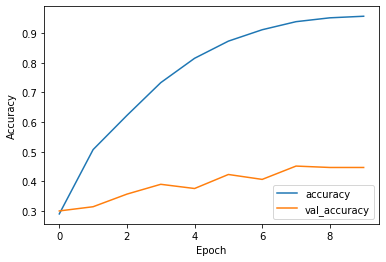

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = naiveCNN.model.evaluate(X_test_reshaped,  y_test_norm, verbose=2)
print('test_acc',test_acc)


## Data Augmentation with Naive CNN

In [0]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:
# release all memory before a new trial
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import math
from google.colab import drive
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, regularizers
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Project247/'
# root_path = 'gdrive/Shared with me/Project247/'

X_test = np.load(root_path+"X_test.npy")
y_test = np.load(root_path+"y_test.npy")
person_train_valid = np.load(root_path+"person_train_valid.npy")
X_train_valid = np.load(root_path+"X_train_valid.npy")
y_train_valid = np.load(root_path+"y_train_valid.npy")
person_test = np.load(root_path+"person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

# test GPU
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [0]:
# split function for pices of data
def split_data(X_train_valid, X_test, y_train_valid, y_test, test_split = False, use_cv = False, cv = 5, size = 400, step = 20, printSize = False):
  y_test_norm = y_test - np.min(y_test)
  y_train_valid_norm = y_train_valid - np.min(y_train_valid)
  # split train and validation 80:20 (front-rare)
  if use_cv:
    X_train_valid_split = np.array( np.array_split(X_train_valid, cv) )
    X_train = np.concatenate(X_train_valid_split[0:cv-1])
    X_valid = X_train_valid_split[cv-1]
    y_train_valid_split = np.array( np.array_split(y_train_valid_norm, cv) )
    y_train = np.concatenate(y_train_valid_split[0:cv-1])
    y_valid = y_train_valid_split[cv-1]
  else:
    X_train = X_train_valid
    X_valid = X_train_valid[0:2]
    y_train = y_train_valid_norm
    y_valid = y_train_valid_norm[0:2]
  

  # make time be the index (1000, 22, 443)
  X_test_pcs_rsp = X_test.transpose(2,1,0)
  X_train_pcs_rsp = X_train.transpose(2,1,0)
  X_valid_pcs_rsp = X_valid.transpose(2,1,0)
  times = math.ceil( (X_test_pcs_rsp.shape[0]-size) /step )

  # split timestamp into small pieces (45, 100, 22, 443)
  if test_split:
    X_test_pcs_rsp = np.array([X_test_pcs_rsp[i : i + size] for i in range(0, X_test_pcs_rsp.shape[0]-size, step)])
  else:
    X_test_pcs_rsp = X_test_pcs_rsp[0 : size]
  X_train_pcs_rsp =  np.array([X_train_pcs_rsp[i : i + size] for i in range(0, X_train_pcs_rsp.shape[0]-size, step)])
  X_valid_pcs_rsp =  np.array([X_valid_pcs_rsp[i : i + size] for i in range(0, X_valid_pcs_rsp.shape[0]-size, step)])
  
  # make samples be the index (45, 443, 22, 100)
  if test_split:
    X_test_pcs_rsp = X_test_pcs_rsp.transpose(0,3,2,1)
  else:
    X_test_pcs_rsp = X_test_pcs_rsp.transpose(2,1,0)
  X_train_pcs_rsp = X_train_pcs_rsp.transpose(0,3,2,1)
  X_valid_pcs_rsp = X_valid_pcs_rsp.transpose(0,3,2,1)
  
  # combine all samples together (45*443, 22, 100)
  if test_split:
    X_test_pcs_rsp = np.concatenate(X_test_pcs_rsp, axis=0)
  X_train_pcs_rsp = np.concatenate(X_train_pcs_rsp, axis=0)
  X_valid_pcs_rsp = np.concatenate(X_valid_pcs_rsp, axis=0)
  
  # repeat n times of the whole y array
  if test_split:
    y_test_norm_pcs = np.tile(y_test_norm, times)
  else:
    y_test_norm_pcs = y_test_norm
  y_train_norm_pcs = np.tile(y_train, times)
  y_valid_norm_pcs = np.tile(y_valid, times)
  
  if printSize:
      print(X_test_pcs_rsp.shape)
      print(X_train_pcs_rsp.shape)
      print(X_valid_pcs_rsp.shape)
      print(len(y_test_norm_pcs))
      print(len(y_train_norm_pcs))
      print(len(y_valid_norm_pcs))
  return X_train_pcs_rsp, X_valid_pcs_rsp, X_test_pcs_rsp, y_train_norm_pcs, y_valid_norm_pcs, y_test_norm_pcs

CNN with Splitted Data

In [0]:
# Delete previous models
# del naiveCNN
# reshape for CNN
size = 900
step = 10
X_train_pcs_rsp, X_valid_pcs_rsp, X_test_pcs_rsp, y_train_norm_pcs, y_valid_norm_pcs, y_test_norm_pcs = \
    split_data(X_train_valid, X_test, y_train_valid, y_test, test_split = True, use_cv = True, cv = 5, size = size, step = step, printSize = True)

X_test_pcs_reshaped = X_test_pcs_rsp.transpose(0,2,1)
X_test_pcs_reshaped = np.expand_dims(X_test_pcs_reshaped, axis=1)
X_train_pcs_reshaped = X_train_pcs_rsp.transpose(0,2,1)
X_train_pcs_reshaped = np.expand_dims(X_train_pcs_reshaped, axis=1)
X_valid_pcs_reshaped = X_valid_pcs_rsp.transpose(0,2,1)
X_valid_pcs_reshaped = np.expand_dims(X_valid_pcs_reshaped, axis=1)

print(X_test_pcs_reshaped.shape)
print(X_train_pcs_reshaped.shape)
print(X_valid_pcs_reshaped.shape)

(4430, 22, 900)
(16920, 22, 900)
(4230, 22, 900)
4430
16920
4230
(4430, 1, 900, 22)
(16920, 1, 900, 22)
(4230, 1, 900, 22)


In [0]:
class CNN_pcs:
    def __init__(self, size):
        self.model = models.Sequential()
        # layer0 - CNN 1x3
        self.model.add(layers.Conv2D(32, (1, 8), activation='relu', input_shape=(1, size, 22)))
        self.model.add(layers.BatchNormalization())
        # layer1 - MaxPooling
        self.model.add(layers.MaxPooling2D((1, 4)))
        # layer2 - CNN 1x3
        self.model.add(layers.Conv2D(64, (1, 8), activation='relu'))
        self.model.add(layers.BatchNormalization())
        # layer3 - FC
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(64, activation='relu'))
        self.model.add(layers.BatchNormalization())
        # layer4 - FC + softmax
        self.model.add(layers.Dense(4,activation='softmax'))
        
        # compile
        opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        self.model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    def summary(self):
        self.model.summary()   

In [0]:
naiveCNN_pcs = CNN_pcs(size)
naiveCNN_pcs.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 1, 893, 32)        5664      
_________________________________________________________________
batch_normalization_12 (Batc (None, 1, 893, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 223, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 216, 64)        16448     
_________________________________________________________________
batch_normalization_13 (Batc (None, 1, 216, 64)        256       
_________________________________________________________________
flatten_4 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [0]:
history = naiveCNN_pcs.model.fit(X_train_pcs_reshaped, y_train_norm_pcs, batch_size=40, epochs=10, 
                       verbose=1, validation_data=(X_valid_pcs_reshaped, y_valid_norm_pcs))

Train on 16920 samples, validate on 4230 samples
Epoch 1/10
16920/16920 [==============================] - 4s 216us/sample - loss: 1.2478 - accuracy: 0.4690 - val_loss: 1.2367 - val_accuracy: 0.4920
Epoch 2/10
16920/16920 [==============================] - 3s 174us/sample - loss: 1.0611 - accuracy: 0.6858 - val_loss: 1.1637 - val_accuracy: 0.5615
Epoch 3/10
16920/16920 [==============================] - 3s 175us/sample - loss: 0.9596 - accuracy: 0.7930 - val_loss: 1.1377 - val_accuracy: 0.5972
Epoch 4/10
16920/16920 [==============================] - 3s 177us/sample - loss: 0.8909 - accuracy: 0.8645 - val_loss: 1.1353 - val_accuracy: 0.5934
Epoch 5/10
16920/16920 [==============================] - 3s 175us/sample - loss: 0.8444 - accuracy: 0.9099 - val_loss: 1.1407 - val_accuracy: 0.5901
Epoch 6/10
16920/16920 [==============================] - 3s 175us/sample - loss: 0.8112 - accuracy: 0.9410 - val_loss: 1.1203 - val_accuracy: 0.6142
Epoch 7/10
16920/16920 [===========================

4430/4430 - 1s - loss: 1.1348 - accuracy: 0.5939
test_acc 0.5939052


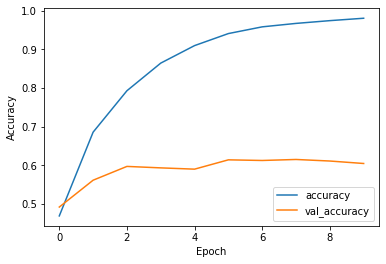

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = naiveCNN_pcs.model.evaluate(X_test_pcs_reshaped,  y_test_norm_pcs, verbose=2)
print('test_acc',test_acc)

## Optimal Time Window with the Optimal CNN

In [0]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:
# release all memory before a new trial
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import math
from google.colab import drive
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, regularizers
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Project247/'
# root_path = 'gdrive/Shared with me/Project247/'

X_test = np.load(root_path+"X_test.npy")
y_test = np.load(root_path+"y_test.npy")
person_train_valid = np.load(root_path+"person_train_valid.npy")
X_train_valid = np.load(root_path+"X_train_valid.npy")
y_train_valid = np.load(root_path+"y_train_valid.npy")
person_test = np.load(root_path+"person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

# test GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)
Found GPU at: /device:GPU:0


In [0]:
# split function for pices of data
def split_data(X_train_valid, X_test, y_train_valid, y_test, test_split = False, use_cv = False, cv = 5, size = 400, step = 20, printSize = False):
  y_test_norm = y_test - np.min(y_test)
  y_train_valid_norm = y_train_valid - np.min(y_train_valid)
  # split train and validation 80:20 (front-rare)
  if use_cv:
    X_train_valid_split = np.array( np.array_split(X_train_valid, cv) )
    X_train = np.concatenate(X_train_valid_split[0:cv-1])
    X_valid = X_train_valid_split[cv-1]
    y_train_valid_split = np.array( np.array_split(y_train_valid_norm, cv) )
    y_train = np.concatenate(y_train_valid_split[0:cv-1])
    y_valid = y_train_valid_split[cv-1]
  else:
    X_train = X_train_valid
    X_valid = X_train_valid[0:2]
    y_train = y_train_valid_norm
    y_valid = y_train_valid_norm[0:2]
  

  # make time be the index (1000, 22, 443)
  X_test_pcs_rsp = X_test.transpose(2,1,0)
  X_train_pcs_rsp = X_train.transpose(2,1,0)
  X_valid_pcs_rsp = X_valid.transpose(2,1,0)
  times = math.ceil( (X_test_pcs_rsp.shape[0]-size) /step )

  # split timestamp into small pieces (45, 100, 22, 443)
  if test_split:
    X_test_pcs_rsp = np.array([X_test_pcs_rsp[i : i + size] for i in range(0, X_test_pcs_rsp.shape[0]-size, step)])
  else:
    X_test_pcs_rsp = X_test_pcs_rsp[0 : size]
  X_train_pcs_rsp =  np.array([X_train_pcs_rsp[i : i + size] for i in range(0, X_train_pcs_rsp.shape[0]-size, step)])
  X_valid_pcs_rsp =  np.array([X_valid_pcs_rsp[i : i + size] for i in range(0, X_valid_pcs_rsp.shape[0]-size, step)])
  
  # make samples be the index (45, 443, 22, 100)
  if test_split:
    X_test_pcs_rsp = X_test_pcs_rsp.transpose(0,3,2,1)
  else:
    X_test_pcs_rsp = X_test_pcs_rsp.transpose(2,1,0)
  X_train_pcs_rsp = X_train_pcs_rsp.transpose(0,3,2,1)
  X_valid_pcs_rsp = X_valid_pcs_rsp.transpose(0,3,2,1)
  
  # combine all samples together (45*443, 22, 100)
  if test_split:
    X_test_pcs_rsp = np.concatenate(X_test_pcs_rsp, axis=0)
  X_train_pcs_rsp = np.concatenate(X_train_pcs_rsp, axis=0)
  X_valid_pcs_rsp = np.concatenate(X_valid_pcs_rsp, axis=0)
  
  # repeat n times of the whole y array
  if test_split:
    y_test_norm_pcs = np.tile(y_test_norm, times)
  else:
    y_test_norm_pcs = y_test_norm
  y_train_norm_pcs = np.tile(y_train, times)
  y_valid_norm_pcs = np.tile(y_valid, times)
  
  if printSize:
      print(X_test_pcs_rsp.shape)
      print(X_train_pcs_rsp.shape)
      print(X_valid_pcs_rsp.shape)
      print(len(y_test_norm_pcs))
      print(len(y_train_norm_pcs))
      print(len(y_valid_norm_pcs))
  return X_train_pcs_rsp, X_valid_pcs_rsp, X_test_pcs_rsp, y_train_norm_pcs, y_valid_norm_pcs, y_test_norm_pcs

In [0]:
# reg options and opt options
class CNN_pcs:
  def __init__(self, size, reg_name='l2', reg_value=0.1, opt_name='Nesterov'):
    self.model = models.Sequential()
    # layer0 - CNN 1x3
    self.model.add(layers.Conv2D(32, (1, 8), activation='relu', input_shape=(1, size, 22)))
    self.model.add(layers.BatchNormalization())
    # layer1 - MaxPooling
    self.model.add(layers.MaxPooling2D((1, 4)))
    # layer2 - CNN 1x3
    self.model.add(layers.Conv2D(64, (1, 8), activation='relu'))
    self.model.add(layers.BatchNormalization())
    # add reg
    if reg_name == 'l2':
      # layer3 - FC
      self.model.add(layers.Flatten())
      self.model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=reg_value)))
      self.model.add(layers.BatchNormalization())
      # layer4 - FC + softmax
      self.model.add(layers.Dense(4,activation='softmax', kernel_regularizer=regularizers.l2(l=reg_value)))
    elif reg_name == 'l1':
      # layer3 - FC
      self.model.add(layers.Flatten())
      self.model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(l=reg_value)))
      self.model.add(layers.BatchNormalization())
      # layer4 - FC + softmax
      self.model.add(layers.Dense(4,activation='softmax', kernel_regularizer=regularizers.l1(l=reg_value)))
    else:
      # layer3 - FC
      self.model.add(layers.Flatten())
      self.model.add(layers.Dense(64, activation='relu'))
      self.model.add(layers.BatchNormalization())
      # layer4 - FC + softmax
      self.model.add(layers.Dense(4,activation='softmax'))

    # compile
    if opt_name=='Adam':
      opt = optimizers.Adam()
    elif opt_name=='RMSprop':
      opt = optimizers.RMSprop()
    else:
      opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    self.model.compile(optimizer=opt,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

  def summary(self):
      self.model.summary()     

  

In [0]:
# ['reg name', 'l1', 'reg value', 0.001, 'opt name', 'Nesterov', 'batch size', 40, 'epochs', 20]
reg_name='l1'
reg_value=0.001
opt_name='Nesterov'
batch_size=40
epochs=20

size_list = [100, 200, 300, 400, 500, 600, 700, 800, 900]
for size in size_list:
  # only one sample
  step = 1000 - size
  X_train_pcs_rsp, X_valid_pcs_rsp, X_test_pcs_rsp, y_train_norm_pcs, y_valid_norm_pcs, y_test_norm_pcs = \
      split_data(X_train_valid, X_test, y_train_valid, y_test, test_split = True, use_cv = True, cv = 5, size = size, step = step, printSize = False)

  X_test_pcs_reshaped = X_test_pcs_rsp.transpose(0,2,1)
  X_test_pcs_reshaped = np.expand_dims(X_test_pcs_reshaped, axis=1)
  X_train_pcs_reshaped = X_train_pcs_rsp.transpose(0,2,1)
  X_train_pcs_reshaped = np.expand_dims(X_train_pcs_reshaped, axis=1)
  X_valid_pcs_reshaped = X_valid_pcs_rsp.transpose(0,2,1)
  X_valid_pcs_reshaped = np.expand_dims(X_valid_pcs_reshaped, axis=1)
  
  # models
  bestCNN_pcs = CNN_pcs(size,reg_name,reg_value,opt_name)
  history = bestCNN_pcs.model.fit(X_train_pcs_reshaped, y_train_norm_pcs, batch_size=50, epochs=10, 
                       verbose=0, validation_data=(X_valid_pcs_reshaped, y_valid_norm_pcs))
  test_loss, test_acc = bestCNN_pcs.model.evaluate(X_test_pcs_reshaped,  y_test_norm_pcs, verbose=2)
  print('time window:',size,'test_acc',test_acc)

443/443 - 0s - loss: 2.1618 - accuracy: 0.4176
time window: 100 test_acc 0.41760722
443/443 - 0s - loss: 2.0386 - accuracy: 0.4379
time window: 200 test_acc 0.43792325
443/443 - 0s - loss: 2.0879 - accuracy: 0.4831
time window: 300 test_acc 0.48307
443/443 - 0s - loss: 2.1264 - accuracy: 0.4898
time window: 400 test_acc 0.489842
443/443 - 0s - loss: 2.1981 - accuracy: 0.4921
time window: 500 test_acc 0.49209931
443/443 - 0s - loss: 2.3396 - accuracy: 0.4718
time window: 600 test_acc 0.4717833
443/443 - 0s - loss: 2.3847 - accuracy: 0.5079
time window: 700 test_acc 0.50790066
443/443 - 0s - loss: 2.5239 - accuracy: 0.4808
time window: 800 test_acc 0.48081264
443/443 - 0s - loss: 2.5946 - accuracy: 0.4582
time window: 900 test_acc 0.4582393


In [0]:
# ['reg name', 'l1', 'reg value', 0.001, 'opt name', 'Nesterov', 'batch size', 40, 'epochs', 20]
reg_name='l1'
reg_value=0.001
opt_name='Nesterov'
batch_size=40
epochs=20

size_list = [100, 200, 300, 400, 500, 600, 700, 800, 900]
for size in size_list:
  # augmentation to 10 samples
  step = int( (1000 - size) / 10 )
  X_train_pcs_rsp, X_valid_pcs_rsp, X_test_pcs_rsp, y_train_norm_pcs, y_valid_norm_pcs, y_test_norm_pcs = \
      split_data(X_train_valid, X_test, y_train_valid, y_test, use_cv = True, cv = 5, size = size, step = step, printSize = False)

  X_test_pcs_reshaped = X_test_pcs_rsp.transpose(0,2,1)
  X_test_pcs_reshaped = np.expand_dims(X_test_pcs_reshaped, axis=1)
  X_train_pcs_reshaped = X_train_pcs_rsp.transpose(0,2,1)
  X_train_pcs_reshaped = np.expand_dims(X_train_pcs_reshaped, axis=1)
  X_valid_pcs_reshaped = X_valid_pcs_rsp.transpose(0,2,1)
  X_valid_pcs_reshaped = np.expand_dims(X_valid_pcs_reshaped, axis=1)
  
  # models
  bestCNN_pcs = CNN_pcs(size,reg_name,reg_value,opt_name)
  history = bestCNN_pcs.model.fit(X_train_pcs_reshaped, y_train_norm_pcs, batch_size=50, epochs=10, 
                       verbose=0, validation_data=(X_valid_pcs_reshaped, y_valid_norm_pcs))
  test_loss, test_acc = bestCNN_pcs.model.evaluate(X_test_pcs_reshaped,  y_test_norm_pcs, verbose=2)
  print('time window:',size,'test_acc',test_acc)

443/443 - 0s - loss: 1.4476 - accuracy: 0.2957
time window: 100 test_acc 0.29571107
443/443 - 0s - loss: 1.5403 - accuracy: 0.3341
time window: 200 test_acc 0.3340858
443/443 - 0s - loss: 1.5312 - accuracy: 0.3454
time window: 300 test_acc 0.34537247
443/443 - 0s - loss: 1.6115 - accuracy: 0.4537
time window: 400 test_acc 0.4537246
443/443 - 0s - loss: 1.6959 - accuracy: 0.4379
time window: 500 test_acc 0.43792325
443/443 - 0s - loss: 1.7490 - accuracy: 0.4537
time window: 600 test_acc 0.4537246
443/443 - 0s - loss: 1.7378 - accuracy: 0.4898
time window: 700 test_acc 0.489842
443/443 - 0s - loss: 1.8050 - accuracy: 0.5418
time window: 800 test_acc 0.54176074
443/443 - 0s - loss: 1.7878 - accuracy: 0.5576
time window: 900 test_acc 0.55756205


## Grid Search for Optimal CNN with the Best Hyperparameters

In [0]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:
# release all memory before a new trial
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import math
from google.colab import drive
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, regularizers
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Project247/'
# root_path = 'gdrive/Shared with me/Project247/'

X_test = np.load(root_path+"X_test.npy")
y_test = np.load(root_path+"y_test.npy")
person_train_valid = np.load(root_path+"person_train_valid.npy")
X_train_valid = np.load(root_path+"X_train_valid.npy")
y_train_valid = np.load(root_path+"y_train_valid.npy")
person_test = np.load(root_path+"person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

# test GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)
Found GPU at: /device:GPU:0


In [0]:
# split function for pices of data
def split_data(X_train_valid, X_test, y_train_valid, y_test, test_split = False, use_cv = False, cv = 5, size = 400, step = 20, printSize = False):
  y_test_norm = y_test - np.min(y_test)
  y_train_valid_norm = y_train_valid - np.min(y_train_valid)
  # split train and validation 80:20 (front-rare)
  if use_cv:
    X_train_valid_split = np.array( np.array_split(X_train_valid, cv) )
    X_train = np.concatenate(X_train_valid_split[0:cv-1])
    X_valid = X_train_valid_split[cv-1]
    y_train_valid_split = np.array( np.array_split(y_train_valid_norm, cv) )
    y_train = np.concatenate(y_train_valid_split[0:cv-1])
    y_valid = y_train_valid_split[cv-1]
  else:
    X_train = X_train_valid
    X_valid = X_train_valid[0:2]
    y_train = y_train_valid_norm
    y_valid = y_train_valid_norm[0:2]
  

  # make time be the index (1000, 22, 443)
  X_test_pcs_rsp = X_test.transpose(2,1,0)
  X_train_pcs_rsp = X_train.transpose(2,1,0)
  X_valid_pcs_rsp = X_valid.transpose(2,1,0)
  times = math.ceil( (X_test_pcs_rsp.shape[0]-size) /step )

  # split timestamp into small pieces (45, 100, 22, 443)
  if test_split:
    X_test_pcs_rsp = np.array([X_test_pcs_rsp[i : i + size] for i in range(0, X_test_pcs_rsp.shape[0]-size, step)])
  else:
    X_test_pcs_rsp = X_test_pcs_rsp[0 : size]
  X_train_pcs_rsp =  np.array([X_train_pcs_rsp[i : i + size] for i in range(0, X_train_pcs_rsp.shape[0]-size, step)])
  X_valid_pcs_rsp =  np.array([X_valid_pcs_rsp[i : i + size] for i in range(0, X_valid_pcs_rsp.shape[0]-size, step)])
  
  # make samples be the index (45, 443, 22, 100)
  if test_split:
    X_test_pcs_rsp = X_test_pcs_rsp.transpose(0,3,2,1)
  else:
    X_test_pcs_rsp = X_test_pcs_rsp.transpose(2,1,0)
  X_train_pcs_rsp = X_train_pcs_rsp.transpose(0,3,2,1)
  X_valid_pcs_rsp = X_valid_pcs_rsp.transpose(0,3,2,1)
  
  # combine all samples together (45*443, 22, 100)
  if test_split:
    X_test_pcs_rsp = np.concatenate(X_test_pcs_rsp, axis=0)
  X_train_pcs_rsp = np.concatenate(X_train_pcs_rsp, axis=0)
  X_valid_pcs_rsp = np.concatenate(X_valid_pcs_rsp, axis=0)
  
  # repeat n times of the whole y array
  if test_split:
    y_test_norm_pcs = np.tile(y_test_norm, times)
  else:
    y_test_norm_pcs = y_test_norm
  y_train_norm_pcs = np.tile(y_train, times)
  y_valid_norm_pcs = np.tile(y_valid, times)
  
  if printSize:
      print(X_test_pcs_rsp.shape)
      print(X_train_pcs_rsp.shape)
      print(X_valid_pcs_rsp.shape)
      print(len(y_test_norm_pcs))
      print(len(y_train_norm_pcs))
      print(len(y_valid_norm_pcs))
  return X_train_pcs_rsp, X_valid_pcs_rsp, X_test_pcs_rsp, y_train_norm_pcs, y_valid_norm_pcs, y_test_norm_pcs

In [0]:
# Delete previous models
# del naiveCNN
# reshape for CNN
size = 900
step = 100
X_train_pcs_rsp, X_valid_pcs_rsp, X_test_pcs_rsp, y_train_norm_pcs, y_valid_norm_pcs, y_test_norm_pcs = \
    split_data(X_train_valid, X_test, y_train_valid, y_test, test_split = False, use_cv = False, cv = 5, size = size, step = step, printSize = True)

X_test_pcs_reshaped = X_test_pcs_rsp.transpose(0,2,1)
X_test_pcs_reshaped = np.expand_dims(X_test_pcs_reshaped, axis=1)
X_train_pcs_reshaped = X_train_pcs_rsp.transpose(0,2,1)
X_train_pcs_reshaped = np.expand_dims(X_train_pcs_reshaped, axis=1)
X_valid_pcs_reshaped = X_valid_pcs_rsp.transpose(0,2,1)
X_valid_pcs_reshaped = np.expand_dims(X_valid_pcs_reshaped, axis=1)

print(X_test_pcs_reshaped.shape)
print(X_train_pcs_reshaped.shape)
print(X_valid_pcs_reshaped.shape)

(443, 22, 900)
(2115, 22, 900)
(2, 22, 900)
443
2115
2
(443, 1, 900, 22)
(2115, 1, 900, 22)
(2, 1, 900, 22)


In [0]:
# reg options and opt options
class CNN_pcs:
  def __init__(self, size, reg_name='l2', reg_value=0.1, opt_name='Nesterov'):
    self.model = models.Sequential()
    # layer0 - CNN 1x3
    self.model.add(layers.Conv2D(32, (1, 8), activation='relu', input_shape=(1, size, 22)))
    self.model.add(layers.BatchNormalization())
    # layer1 - MaxPooling
    self.model.add(layers.MaxPooling2D((1, 4)))
    # layer2 - CNN 1x3
    self.model.add(layers.Conv2D(64, (1, 8), activation='relu'))
    self.model.add(layers.BatchNormalization())
    # add reg
    if reg_name == 'l2':
      # layer3 - FC
      self.model.add(layers.Flatten())
      self.model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=reg_value)))
      self.model.add(layers.BatchNormalization())
      # layer4 - FC + softmax
      self.model.add(layers.Dense(4,activation='softmax', kernel_regularizer=regularizers.l2(l=reg_value)))
    elif reg_name == 'l1':
      # layer3 - FC
      self.model.add(layers.Flatten())
      self.model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(l=reg_value)))
      self.model.add(layers.BatchNormalization())
      # layer4 - FC + softmax
      self.model.add(layers.Dense(4,activation='softmax', kernel_regularizer=regularizers.l1(l=reg_value)))
    else:
      # layer3 - FC
      self.model.add(layers.Flatten())
      self.model.add(layers.Dense(64, activation='relu'))
      self.model.add(layers.BatchNormalization())
      # layer4 - FC + softmax
      self.model.add(layers.Dense(4,activation='softmax'))

    # compile
    if opt_name=='Adam':
      opt = optimizers.Adam()
    elif opt_name=='RMSprop':
      opt = optimizers.RMSprop()
    else:
      opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    self.model.compile(optimizer=opt,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

  def summary(self):
      self.model.summary()     

  

In [0]:
reg_name_list=['None','l1','l2']
reg_value_list=[0.001,0.0001]
opt_name_list=['Adam','RMSprop','Nesterov']
batch_size_list=[20,40]
epochs_list=[10,20]

acc_list = []
param_list = []
for reg_name in reg_name_list:
  if reg_name == 'None':
    reg_value_list = [0]
  else:
    reg_value_list=[0.001,0.0001]
  for reg_value in reg_value_list:
    for opt_name in opt_name_list:
      for batch_size in batch_size_list:
        for epochs in epochs_list:
          naiveCNN_pcs = CNN_pcs(size,reg_name,reg_value,opt_name)
          with tf.device('/device:GPU:0'):
            # validation_split=0.2 or validation_data=(X_valid_pcs_reshaped, y_valid_norm_pcs)
            history = naiveCNN_pcs.model.fit(X_train_pcs_reshaped, y_train_norm_pcs, batch_size=batch_size, epochs=epochs, 
                                  verbose=0, validation_split=0.2)
          val_acc = history.history['val_accuracy'][-1]
          # test_loss, test_acc = naiveCNN_pcs.model.evaluate(X_test_pcs_reshaped,  y_test_norm_pcs, verbose=2)
          print('reg name',reg_name,'reg value',reg_value,'opt name',opt_name,'batch size',batch_size,'epochs',epochs)
          print('time window:',size,'val_acc',val_acc)  # test on validation data
          param_list.append(['reg name',reg_name,'reg value',reg_value,'opt name',opt_name,'batch size',batch_size,'epochs',epochs])
          acc_list.append(val_acc)
          del naiveCNN_pcs, history, val_acc

reg name None reg value 0 opt name Adam batch size 20 epochs 10
time window: 900 val_acc 0.47517732
reg name None reg value 0 opt name Adam batch size 20 epochs 20
time window: 900 val_acc 0.51300234
reg name None reg value 0 opt name Adam batch size 40 epochs 10
time window: 900 val_acc 0.52718675
reg name None reg value 0 opt name Adam batch size 40 epochs 20
time window: 900 val_acc 0.4964539
reg name None reg value 0 opt name RMSprop batch size 20 epochs 10
time window: 900 val_acc 0.45626476
reg name None reg value 0 opt name RMSprop batch size 20 epochs 20
time window: 900 val_acc 0.50827426
reg name None reg value 0 opt name RMSprop batch size 40 epochs 10
time window: 900 val_acc 0.48699763
reg name None reg value 0 opt name RMSprop batch size 40 epochs 20
time window: 900 val_acc 0.50591016
reg name None reg value 0 opt name Nesterov batch size 20 epochs 10
time window: 900 val_acc 0.49172577
reg name None reg value 0 opt name Nesterov batch size 20 epochs 20
time window: 900 

In [0]:
index = np.argmax(np.array(acc_list))
print('Best param')
print(index, acc_list[index])
print(param_list[index])

Best param
23 0.5437352
['reg name', 'l1', 'reg value', 0.001, 'opt name', 'Nesterov', 'batch size', 40, 'epochs', 20]


## Final Optimal CNN with Best Hyperparameters and the Time Window

In [0]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:
# release all memory before a new trial
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import math
from google.colab import drive
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, regularizers
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Project247/'
# root_path = 'gdrive/Shared with me/Project247/'

X_test = np.load(root_path+"X_test.npy")
y_test = np.load(root_path+"y_test.npy")
person_train_valid = np.load(root_path+"person_train_valid.npy")
X_train_valid = np.load(root_path+"X_train_valid.npy")
y_train_valid = np.load(root_path+"y_train_valid.npy")
person_test = np.load(root_path+"person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

# test GPU
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [0]:
# split function for pices of data
def split_data(X_train_valid, X_test, y_train_valid, y_test, test_split = False, use_cv = False, cv = 5, size = 400, step = 20, printSize = False):
  y_test_norm = y_test - np.min(y_test)
  y_train_valid_norm = y_train_valid - np.min(y_train_valid)
  # split train and validation 80:20 (front-rare)
  if use_cv:
    X_train_valid_split = np.array( np.array_split(X_train_valid, cv) )
    X_train = np.concatenate(X_train_valid_split[0:cv-1])
    X_valid = X_train_valid_split[cv-1]
    y_train_valid_split = np.array( np.array_split(y_train_valid_norm, cv) )
    y_train = np.concatenate(y_train_valid_split[0:cv-1])
    y_valid = y_train_valid_split[cv-1]
  else:
    X_train = X_train_valid
    X_valid = X_train_valid[0:2]
    y_train = y_train_valid_norm
    y_valid = y_train_valid_norm[0:2]
  

  # make time be the index (1000, 22, 443)
  X_test_pcs_rsp = X_test.transpose(2,1,0)
  X_train_pcs_rsp = X_train.transpose(2,1,0)
  X_valid_pcs_rsp = X_valid.transpose(2,1,0)
  times = math.ceil( (X_test_pcs_rsp.shape[0]-size) /step )

  # split timestamp into small pieces (45, 100, 22, 443)
  if test_split:
    X_test_pcs_rsp = np.array([X_test_pcs_rsp[i : i + size] for i in range(0, X_test_pcs_rsp.shape[0]-size, step)])
  else:
    X_test_pcs_rsp = X_test_pcs_rsp[0 : size]
  X_train_pcs_rsp =  np.array([X_train_pcs_rsp[i : i + size] for i in range(0, X_train_pcs_rsp.shape[0]-size, step)])
  X_valid_pcs_rsp =  np.array([X_valid_pcs_rsp[i : i + size] for i in range(0, X_valid_pcs_rsp.shape[0]-size, step)])
  
  # make samples be the index (45, 443, 22, 100)
  if test_split:
    X_test_pcs_rsp = X_test_pcs_rsp.transpose(0,3,2,1)
  else:
    X_test_pcs_rsp = X_test_pcs_rsp.transpose(2,1,0)
  X_train_pcs_rsp = X_train_pcs_rsp.transpose(0,3,2,1)
  X_valid_pcs_rsp = X_valid_pcs_rsp.transpose(0,3,2,1)
  
  # combine all samples together (45*443, 22, 100)
  if test_split:
    X_test_pcs_rsp = np.concatenate(X_test_pcs_rsp, axis=0)
  X_train_pcs_rsp = np.concatenate(X_train_pcs_rsp, axis=0)
  X_valid_pcs_rsp = np.concatenate(X_valid_pcs_rsp, axis=0)
  
  # repeat n times of the whole y array
  if test_split:
    y_test_norm_pcs = np.tile(y_test_norm, times)
  else:
    y_test_norm_pcs = y_test_norm
  y_train_norm_pcs = np.tile(y_train, times)
  y_valid_norm_pcs = np.tile(y_valid, times)
  
  if printSize:
      print(X_test_pcs_rsp.shape)
      print(X_train_pcs_rsp.shape)
      print(X_valid_pcs_rsp.shape)
      print(len(y_test_norm_pcs))
      print(len(y_train_norm_pcs))
      print(len(y_valid_norm_pcs))
  return X_train_pcs_rsp, X_valid_pcs_rsp, X_test_pcs_rsp, y_train_norm_pcs, y_valid_norm_pcs, y_test_norm_pcs

In [0]:
# Delete previous models
# del naiveCNN
# reshape for CNN
size = 900
step = 5
X_train_pcs_rsp, X_valid_pcs_rsp, X_test_pcs_rsp, y_train_norm_pcs, y_valid_norm_pcs, y_test_norm_pcs = \
    split_data(X_train_valid, X_test, y_train_valid, y_test, test_split = True, use_cv = True, cv = 5, size = size, step = step, printSize = True)

X_test_pcs_reshaped = X_test_pcs_rsp.transpose(0,2,1)
X_test_pcs_reshaped = np.expand_dims(X_test_pcs_reshaped, axis=1)
X_train_pcs_reshaped = X_train_pcs_rsp.transpose(0,2,1)
X_train_pcs_reshaped = np.expand_dims(X_train_pcs_reshaped, axis=1)
X_valid_pcs_reshaped = X_valid_pcs_rsp.transpose(0,2,1)
X_valid_pcs_reshaped = np.expand_dims(X_valid_pcs_reshaped, axis=1)

print(X_test_pcs_reshaped.shape)
print(X_train_pcs_reshaped.shape)
print(X_valid_pcs_reshaped.shape)

(8860, 22, 900)
(33840, 22, 900)
(8460, 22, 900)
8860
33840
8460
(8860, 1, 900, 22)
(33840, 1, 900, 22)
(8460, 1, 900, 22)


In [0]:
# reg options and opt options
class CNN_pcs:
  def __init__(self, size, reg_name='l2', reg_value=0.1, opt_name='Nesterov'):
    self.model = models.Sequential()
    # layer0 - CNN 1x3
    self.model.add(layers.Conv2D(32, (1, 8), activation='relu', input_shape=(1, size, 22)))
    self.model.add(layers.BatchNormalization())
    # layer1 - MaxPooling
    self.model.add(layers.MaxPooling2D((1, 4)))
    # layer2 - CNN 1x3
    self.model.add(layers.Conv2D(64, (1, 8), activation='relu'))
    self.model.add(layers.BatchNormalization())
    # add reg
    if reg_name == 'l2':
      # layer3 - FC
      self.model.add(layers.Flatten())
      self.model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=reg_value)))
      self.model.add(layers.BatchNormalization())
      # layer4 - FC + softmax
      self.model.add(layers.Dense(4,activation='softmax', kernel_regularizer=regularizers.l2(l=reg_value)))
    elif reg_name == 'l1':
      # layer3 - FC
      self.model.add(layers.Flatten())
      self.model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(l=reg_value)))
      self.model.add(layers.BatchNormalization())
      # layer4 - FC + softmax
      self.model.add(layers.Dense(4,activation='softmax', kernel_regularizer=regularizers.l1(l=reg_value)))
    else:
      # layer3 - FC
      self.model.add(layers.Flatten())
      self.model.add(layers.Dense(64, activation='relu'))
      self.model.add(layers.BatchNormalization())
      # layer4 - FC + softmax
      self.model.add(layers.Dense(4,activation='softmax'))

    # compile
    if opt_name=='Adam':
      opt = optimizers.Adam()
    elif opt_name=='RMSprop':
      opt = optimizers.RMSprop()
    else:
      opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    self.model.compile(optimizer=opt,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

  def summary(self):
      self.model.summary()     

  

In [0]:
# ['reg name', 'l1', 'reg value', 0.001, 'opt name', 'Nesterov', 'batch size', 40, 'epochs', 20]
reg_name='l1'
reg_value=0.001
opt_name='Nesterov'
batch_size=40
epochs=20

bestCNN_pcs = CNN_pcs(size,reg_name,reg_value,opt_name)
# validation_split=0.2 or validation_data=(X_valid_pcs_reshaped, y_valid_norm_pcs)
history = bestCNN_pcs.model.fit(X_train_pcs_reshaped, y_train_norm_pcs, batch_size=batch_size, epochs=epochs, 
                      verbose=1, validation_data=(X_valid_pcs_reshaped, y_valid_norm_pcs))
test_loss, test_acc = bestCNN_pcs.model.evaluate(X_test_pcs_reshaped,  y_test_norm_pcs, verbose=2)
print('reg name',reg_name,'reg value',reg_value,'opt name',opt_name,'batch size',batch_size,'epochs',epochs)
print('time window:',size,'test_acc',test_acc)

Train on 33840 samples, validate on 8460 samples
Epoch 1/20
33840/33840 [==============================] - 13s 375us/sample - loss: 2.8217 - accuracy: 0.5131 - val_loss: 2.0584 - val_accuracy: 0.5032
Epoch 2/20
33840/33840 [==============================] - 6s 166us/sample - loss: 1.8949 - accuracy: 0.6249 - val_loss: 1.9273 - val_accuracy: 0.5526
Epoch 3/20
33840/33840 [==============================] - 6s 167us/sample - loss: 1.7617 - accuracy: 0.6822 - val_loss: 1.8043 - val_accuracy: 0.5691
Epoch 4/20
33840/33840 [==============================] - 6s 166us/sample - loss: 1.6228 - accuracy: 0.7223 - val_loss: 1.6557 - val_accuracy: 0.6052
Epoch 5/20
33840/33840 [==============================] - 6s 165us/sample - loss: 1.5239 - accuracy: 0.7496 - val_loss: 1.6532 - val_accuracy: 0.5843
Epoch 6/20
33840/33840 [==============================] - 6s 172us/sample - loss: 1.4628 - accuracy: 0.7763 - val_loss: 1.6062 - val_accuracy: 0.5838
Epoch 7/20
33840/33840 [==========================

## Test on Original Testing Data

In [0]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:
# release all memory before a new trial
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import math
from google.colab import drive
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, regularizers
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Project247/'
# root_path = 'gdrive/Shared with me/Project247/'

X_test = np.load(root_path+"X_test.npy")
y_test = np.load(root_path+"y_test.npy")
person_train_valid = np.load(root_path+"person_train_valid.npy")
X_train_valid = np.load(root_path+"X_train_valid.npy")
y_train_valid = np.load(root_path+"y_train_valid.npy")
person_test = np.load(root_path+"person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

# test GPU
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [0]:
# split function for pices of data
def split_data(X_train_valid, X_test, y_train_valid, y_test, test_split = False, use_cv = False, cv = 5, size = 400, step = 20, printSize = False):
  y_test_norm = y_test - np.min(y_test)
  y_train_valid_norm = y_train_valid - np.min(y_train_valid)
  # split train and validation 80:20 (front-rare)
  if use_cv:
    X_train_valid_split = np.array( np.array_split(X_train_valid, cv) )
    X_train = np.concatenate(X_train_valid_split[0:cv-1])
    X_valid = X_train_valid_split[cv-1]
    y_train_valid_split = np.array( np.array_split(y_train_valid_norm, cv) )
    y_train = np.concatenate(y_train_valid_split[0:cv-1])
    y_valid = y_train_valid_split[cv-1]
  else:
    X_train = X_train_valid
    X_valid = X_train_valid[0:2]
    y_train = y_train_valid_norm
    y_valid = y_train_valid_norm[0:2]
  

  # make time be the index (1000, 22, 443)
  X_test_pcs_rsp = X_test.transpose(2,1,0)
  X_train_pcs_rsp = X_train.transpose(2,1,0)
  X_valid_pcs_rsp = X_valid.transpose(2,1,0)
  times = math.ceil( (X_test_pcs_rsp.shape[0]-size) /step )

  # split timestamp into small pieces (45, 100, 22, 443)
  if test_split:
    X_test_pcs_rsp = np.array([X_test_pcs_rsp[i : i + size] for i in range(0, X_test_pcs_rsp.shape[0]-size, step)])
  else:
    X_test_pcs_rsp = X_test_pcs_rsp[0 : size]
  X_train_pcs_rsp =  np.array([X_train_pcs_rsp[i : i + size] for i in range(0, X_train_pcs_rsp.shape[0]-size, step)])
  X_valid_pcs_rsp =  np.array([X_valid_pcs_rsp[i : i + size] for i in range(0, X_valid_pcs_rsp.shape[0]-size, step)])
  
  # make samples be the index (45, 443, 22, 100)
  if test_split:
    X_test_pcs_rsp = X_test_pcs_rsp.transpose(0,3,2,1)
  else:
    X_test_pcs_rsp = X_test_pcs_rsp.transpose(2,1,0)
  X_train_pcs_rsp = X_train_pcs_rsp.transpose(0,3,2,1)
  X_valid_pcs_rsp = X_valid_pcs_rsp.transpose(0,3,2,1)
  
  # combine all samples together (45*443, 22, 100)
  if test_split:
    X_test_pcs_rsp = np.concatenate(X_test_pcs_rsp, axis=0)
  X_train_pcs_rsp = np.concatenate(X_train_pcs_rsp, axis=0)
  X_valid_pcs_rsp = np.concatenate(X_valid_pcs_rsp, axis=0)
  
  # repeat n times of the whole y array
  if test_split:
    y_test_norm_pcs = np.tile(y_test_norm, times)
  else:
    y_test_norm_pcs = y_test_norm
  y_train_norm_pcs = np.tile(y_train, times)
  y_valid_norm_pcs = np.tile(y_valid, times)
  
  if printSize:
      print(X_test_pcs_rsp.shape)
      print(X_train_pcs_rsp.shape)
      print(X_valid_pcs_rsp.shape)
      print(len(y_test_norm_pcs))
      print(len(y_train_norm_pcs))
      print(len(y_valid_norm_pcs))
  return X_train_pcs_rsp, X_valid_pcs_rsp, X_test_pcs_rsp, y_train_norm_pcs, y_valid_norm_pcs, y_test_norm_pcs

In [0]:
# Delete previous models
# del naiveCNN
# reshape for CNN
size = 900
step = 5
X_train_pcs_rsp, X_valid_pcs_rsp, X_test_pcs_rsp, y_train_norm_pcs, y_valid_norm_pcs, y_test_norm_pcs = \
    split_data(X_train_valid, X_test, y_train_valid, y_test, test_split = False, use_cv = True, cv = 5, size = size, step = step, printSize = True)

X_test_pcs_reshaped = X_test_pcs_rsp.transpose(0,2,1)
X_test_pcs_reshaped = np.expand_dims(X_test_pcs_reshaped, axis=1)
X_train_pcs_reshaped = X_train_pcs_rsp.transpose(0,2,1)
X_train_pcs_reshaped = np.expand_dims(X_train_pcs_reshaped, axis=1)
X_valid_pcs_reshaped = X_valid_pcs_rsp.transpose(0,2,1)
X_valid_pcs_reshaped = np.expand_dims(X_valid_pcs_reshaped, axis=1)

print(X_test_pcs_reshaped.shape)
print(X_train_pcs_reshaped.shape)
print(X_valid_pcs_reshaped.shape)

(443, 22, 900)
(33840, 22, 900)
(8460, 22, 900)
443
33840
8460
(443, 1, 900, 22)
(33840, 1, 900, 22)
(8460, 1, 900, 22)


In [0]:
# reg options and opt options
class CNN_pcs:
  def __init__(self, size, reg_name='l2', reg_value=0.1, opt_name='Nesterov'):
    self.model = models.Sequential()
    # layer0 - CNN 1x3
    self.model.add(layers.Conv2D(32, (1, 8), activation='relu', input_shape=(1, size, 22)))
    self.model.add(layers.BatchNormalization())
    # layer1 - MaxPooling
    self.model.add(layers.MaxPooling2D((1, 4)))
    # layer2 - CNN 1x3
    self.model.add(layers.Conv2D(64, (1, 8), activation='relu'))
    self.model.add(layers.BatchNormalization())
    # add reg
    if reg_name == 'l2':
      # layer3 - FC
      self.model.add(layers.Flatten())
      self.model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=reg_value)))
      self.model.add(layers.BatchNormalization())
      # layer4 - FC + softmax
      self.model.add(layers.Dense(4,activation='softmax', kernel_regularizer=regularizers.l2(l=reg_value)))
    elif reg_name == 'l1':
      # layer3 - FC
      self.model.add(layers.Flatten())
      self.model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(l=reg_value)))
      self.model.add(layers.BatchNormalization())
      # layer4 - FC + softmax
      self.model.add(layers.Dense(4,activation='softmax', kernel_regularizer=regularizers.l1(l=reg_value)))
    else:
      # layer3 - FC
      self.model.add(layers.Flatten())
      self.model.add(layers.Dense(64, activation='relu'))
      self.model.add(layers.BatchNormalization())
      # layer4 - FC + softmax
      self.model.add(layers.Dense(4,activation='softmax'))

    # compile
    if opt_name=='Adam':
      opt = optimizers.Adam()
    elif opt_name=='RMSprop':
      opt = optimizers.RMSprop()
    else:
      opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    self.model.compile(optimizer=opt,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

  def summary(self):
      self.model.summary()     

  

In [0]:
# ['reg name', 'l1', 'reg value', 0.001, 'opt name', 'Nesterov', 'batch size', 40, 'epochs', 20]
reg_name='l1'
reg_value=0.001
opt_name='Nesterov'
batch_size=40
epochs=20

bestCNN_pcs = CNN_pcs(size,reg_name,reg_value,opt_name)
# validation_split=0.2 or validation_data=(X_valid_pcs_reshaped, y_valid_norm_pcs)
history = bestCNN_pcs.model.fit(X_train_pcs_reshaped, y_train_norm_pcs, batch_size=batch_size, epochs=epochs, 
                      verbose=1, validation_data=(X_valid_pcs_reshaped, y_valid_norm_pcs))
test_loss, test_acc = bestCNN_pcs.model.evaluate(X_test_pcs_reshaped,  y_test_norm_pcs, verbose=2)
print('reg name',reg_name,'reg value',reg_value,'opt name',opt_name,'batch size',batch_size,'epochs',epochs)
print('time window:',size,'test_acc',test_acc)

Train on 33840 samples, validate on 8460 samples
Epoch 1/20
33840/33840 [==============================] - 12s 368us/sample - loss: 2.8649 - accuracy: 0.5018 - val_loss: 2.0631 - val_accuracy: 0.5017
Epoch 2/20
33840/33840 [==============================] - 5s 162us/sample - loss: 1.9070 - accuracy: 0.6203 - val_loss: 1.8952 - val_accuracy: 0.5501
Epoch 3/20
33840/33840 [==============================] - 5s 159us/sample - loss: 1.7301 - accuracy: 0.6758 - val_loss: 1.7326 - val_accuracy: 0.5877
Epoch 4/20
33840/33840 [==============================] - 5s 160us/sample - loss: 1.6211 - accuracy: 0.7119 - val_loss: 1.6915 - val_accuracy: 0.6057
Epoch 5/20
33840/33840 [==============================] - 5s 161us/sample - loss: 1.5172 - accuracy: 0.7511 - val_loss: 1.6230 - val_accuracy: 0.6225
Epoch 6/20
33840/33840 [==============================] - 5s 162us/sample - loss: 1.4481 - accuracy: 0.7751 - val_loss: 1.6200 - val_accuracy: 0.5658
Epoch 7/20
33840/33840 [==========================

Evaluate on individual subjects

In [0]:
predictions = bestCNN_pcs.model.predict(X_test_pcs_reshaped)
print(predictions.shape)

(443, 4)


In [0]:
# Accuracy for each subject
for i in range(9): 
  print('Subject',i)
  index_test = list(filter(lambda x: person_test[x] == i, range(len(person_test))))
  pred_i = predictions[index_test]
  true_label = y_test_norm_pcs[index_test]
  pred_label = np.array( np.argmax(pred_i, axis=1) )
  acc_final = np.sum(pred_label == true_label) / true_label.shape[0]
  print('Pred acc',acc_final)

Subject 0
Pred acc 0.48
Subject 1
Pred acc 0.54
Subject 2
Pred acc 0.74
Subject 3
Pred acc 0.74
Subject 4
Pred acc 0.56
Subject 5
Pred acc 0.58
Subject 6
Pred acc 0.66
Subject 7
Pred acc 0.7
Subject 8
Pred acc 0.54


In [0]:
from google.colab import files
np.savetxt("bestCNN_predict.csv", predictions, delimiter=",")
files.download('bestCNN_predict.csv')

Train on individual subjects

In [0]:
def pickUpOne(X_train_valid, X_test, y_train_valid, y_test, person_train_valid, person_test, index=0):
  index_train_valid = list(filter(lambda x: person_train_valid[x] == index, range(len(person_train_valid)))) 
  index_test = list(filter(lambda x: person_test[x] == index, range(len(person_test)))) 
  X_train_valid_first = X_train_valid[index_train_valid]
  y_train_valid_first = y_train_valid[index_train_valid]
  X_test_first = X_test[index_test]
  y_test_first = y_test[index_test]
  return X_train_valid_first, X_test_first, y_train_valid_first, y_test_first

In [0]:
for index in range(9):
  print('Working on subject',index)
  X_train_valid_sub, X_test_sub, y_train_valid_sub, y_test_sub = pickUpOne(X_train_valid, X_test, y_train_valid, y_test, person_train_valid, person_test, index)

  pred_list_all = []
  pred_list_all_sub = []
  # ['size', 900, 'reg name', 'l1', 'reg value', 0.001, 0, 'opt name', 'Nesterov', 'step', 0.001, 'decay', 0.001, 'batch size', 48, 'epochs', 40]

  size = 900
  step = 5

  X_train_pcs_rsp, X_valid_pcs_rsp, X_test_pcs_rsp, y_train_norm_pcs, y_valid_norm_pcs, y_test_norm_pcs = \
    split_data(X_train_valid_sub, X_test_sub, y_train_valid_sub, y_test_sub, test_split = False, use_cv = True, cv = 5, size = size, step = step, printSize = False)

  # preprocess data
  X_test_pcs_reshaped = X_test_pcs_rsp.transpose(0,2,1)
  X_test_pcs_reshaped = np.expand_dims(X_test_pcs_reshaped, axis=1)
  X_train_pcs_reshaped = X_train_pcs_rsp.transpose(0,2,1)
  X_train_pcs_reshaped = np.expand_dims(X_train_pcs_reshaped, axis=1)
  X_valid_pcs_reshaped = X_valid_pcs_rsp.transpose(0,2,1)
  X_valid_pcs_reshaped = np.expand_dims(X_valid_pcs_reshaped, axis=1)

  reg_name='l1'
  reg_value=0.001
  opt_name='Nesterov'
  batch_size=40
  epochs=20

  bestCNN_pcs = CNN_pcs(size,reg_name,reg_value,opt_name)
  # validation_split=0.2 or validation_data=(X_valid_pcs_reshaped, y_valid_norm_pcs)
  history = bestCNN_pcs.model.fit(X_train_pcs_reshaped, y_train_norm_pcs, batch_size=batch_size, epochs=epochs, 
                        verbose=0, validation_data=(X_valid_pcs_reshaped, y_valid_norm_pcs))
  test_loss, test_acc = bestCNN_pcs.model.evaluate(X_test_pcs_reshaped,  y_test_norm_pcs, verbose=2)

  print('Subject',index,'test_acc',test_acc)


Working on subject 0
50/50 - 0s - loss: 1.6009 - accuracy: 0.6600
Subject 0 test_acc 0.66
Working on subject 1
50/50 - 0s - loss: 1.8836 - accuracy: 0.4800
Subject 1 test_acc 0.48
Working on subject 2
50/50 - 0s - loss: 1.6360 - accuracy: 0.5000
Subject 2 test_acc 0.5
Working on subject 3
50/50 - 0s - loss: 1.9810 - accuracy: 0.4400
Subject 3 test_acc 0.44
Working on subject 4
47/47 - 0s - loss: 1.5785 - accuracy: 0.6596
Subject 4 test_acc 0.65957445
Working on subject 5
49/49 - 0s - loss: 1.6667 - accuracy: 0.4898
Subject 5 test_acc 0.48979592
Working on subject 6
50/50 - 0s - loss: 1.4118 - accuracy: 0.7200
Subject 6 test_acc 0.72
Working on subject 7
50/50 - 0s - loss: 1.4700 - accuracy: 0.7200
Subject 7 test_acc 0.72
Working on subject 8
47/47 - 0s - loss: 1.1837 - accuracy: 0.8085
Subject 8 test_acc 0.80851066
